<a href="https://colab.research.google.com/github/sysyJEON/class_ai4ml/blob/main/ml_guide/ch04_Classification_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 4장 분류

## 4.1 분류(Classification)의 개요

- 지도학습의 대표적인 유형
- 학습 데이터로 주어진 데이터의 피처와 레이블값(결정 값, 클래스 값)을 머신러닝 알고리즘으로 학습해 모델 생성
- 생성된 모델에 새로운 데이터 값 주어졌을 때 미지의 레이블 값 예측

분류 알고리즘
- 나이브 베이즈(Naive Bayes): 베이즈 통계와 생성 모델 기반
- 로지스틱 회귀(Logistic Regression): 독립변수와 종속변수의 선형 관계성 기반
- 결정 트리(Decision Tree): 데이터 균일도에 따른 규칙 기반
- 서포트 벡터 머신(Support Vector Machine): 개별 클래스 간의 최대 분류 마진을 효과적으로 찾음
- 최소 근접 알고리즘(Nearest Neighbor): 근접 거리 기준
- 심층 연결 기반의 신경망(Neural Network)
- 앙상블(Ensemble): 서로 다른(또는 같은) 머신러닝 알고리즘 결합

앙상블
- 배깅(Bagging)
  - 랜덤 포레스트(Random Forest)
- 부스팅(Boosting)
  - 그래디언트 부스팅(Gradient Boosting)
  - XgBoost(eXtra Gradient Boosting)
  - LightGBM
- 스태킹(Stacking)

- 앙상블 대부분 동일한 알고리즘 결합
- 기본 알고리즘은 결정 트리 일반적으로 사용

## 4.2 결정 트리

데이터에 있는 규칙을 학습을 통해 자동으로 찾아내 트리 기반의 분류 규칙을 만드는 것

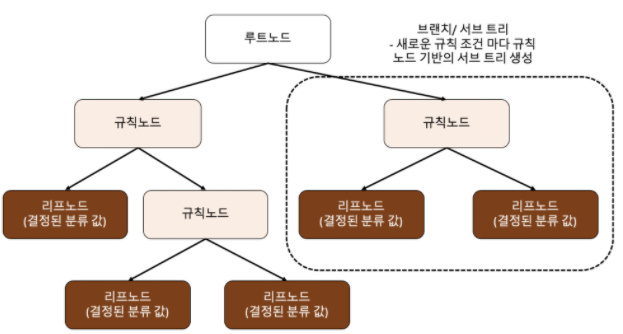

- 규칙 노드(Decision Node): 규칙 조건
  - 데이터 세트의 피처가 결합해 규칙 조건을 만들 때마다 규칙 노드가 만들어진다.
  - 규칙 많으면 복잡 -> 과적합
  - 트리의 깊이(depth) 깊어질수록 결정 트리의 예측 성능이 저하될 가능성 커짐
- 리프 노드(Leaf Node): 결정된 클래스 값
- 새로운 규칙 조건마다 서브 트리(Sub Tree) 생성

가능한 적은 결정 노드로 높은 예측 정확도
- 최대한 많은 데이터 세트가 해당 분류에 속할 수 있도록 결정 노드의 규칙이 정해져야 함
- 어떻게 트리를 분할(Split)할 것인가 중요
- 최대한 균일한 데이터 세트를 구성할 수 있도록 분할
- 정보의 균일도 측정하는 대표적인 방법: 엔트로피를 이용한 정보 이득(Information Gain) 지수와 지니 계수
  - 정보 이득 = 1 - 엔트로피 지수
  - 엔트로피: 데이터 집합의 혼잡도
  - 지니 계수: 경제학의 불평등 지수. 0 평등, 1 불평등
  - 지니 계수 낮을수록 데이터 균일도가 높은 것으로 해석

`DecisionTreeClassifier`
- 사이킷런 결정 트리 알고리즘
- 지니 계수 이용해 데이터 세트 분할
- 정보 이득 높거나 지수 계수 낮은 조건 찾아서 자식 트리 노드에 걸쳐 반복적으로 분할한 뒤, 데이터가 모두 특정 분류에 속하게 되면 분할을 멈추고 분류를 결정

### 결정 트리 모델의 특징

장점
- 쉽다. 직관적
- 피처의 스케일링이나 정규화 등의 사전 가공 영향도가 크지 않다.   

단점
- 과적합으로 알고리즘 성능 떨어진다.
- 이를 극복하기 위해 트리의 크기를 사전에 제한하는 튜닝 필요

### 결정 트리 파라미터

사이킷런의 결정 트리 구현은 `CART`(Classification And Regression Tree) 알고리즘 기반
- `DecisionTreeClassifier`: 분류 클래스
- `DecisionTreeRegressor`: 회귀 클래스

`min_sample_split`
- 노드 분할하기 위한 최소한의 샘플 데이터 수로 과적합 제어하는 데 사용
- 디폴트 2, 작게 설정할수록 분할 노드 많아져 과적합 가능성 증가)

`min_sample_leaf`
- 분할이 될 경우 왼쪽과 오른쪽 브랜치 노드에서 가져야 할 최소한의 샘플 데이터 수

`max_features`
- 최적의 분할 위해 고려할 최대 피처 개수, 디폴트 None(데이터 세트의 모든 피처 사용해 분할 수행)
- `sqrt`, `auto`(sqrt와 동일), `log`, `None`

`max_depth`
- 트리의 최대 깊이 규정
- 디폴트는 None. 완벽하게 클래스 결정 값이 될 때까지 깊이 키우며 분할하거나 노드가 가지는 데이터 개수가 min_sample_split보다 작아질 때까지 계속 깊이 증가
- 과적합 방지 위해 적저한 값으로 제어 필요

`max_leaf_nodes`
- 말단 노드(leaf)의 최대 개수

### 결정 트리 모델의 시각화(Decision Tree Visualization)

`Graphviz` 패키지
- 결정 트리 알고리즘이 어떠한 규칙을 가지고 트리 생성하는지 시각적으로 보여줌

붓꽃 데이터 세트에 결정트리 적용할 때 어떻게 서브 트리가 구성되고 만들어지는지 시각화

- `DecisionTreeClassifer`로 결정 트리 모델의 학습과 예측 수행

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# DecisionTree Classifier 생성
dt_clf = DecisionTreeClassifier(random_state=156)

# 붓꽃 데이터를 로딩하고, 학습과 테스트 데이터 셋으로 분리
iris_data = load_iris()
X_train , X_test , y_train , y_test = train_test_split(iris_data.data, iris_data.target,
                                                       test_size=0.2,  random_state=11)

# DecisionTreeClassifer 학습.
dt_clf.fit(X_train , y_train)

DecisionTreeClassifier(random_state=156)

- `export_graphviz()`그래프 형태로 시각화할 수 있는 출력 파일 생성

In [ ]:
from sklearn.tree import export_graphviz

# export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함.
export_graphviz(dt_clf, out_file="tree.dot", class_names=iris_data.target_names , \
feature_names = iris_data.feature_names, impurity=True, filled=True)
# 학습 완료된 estimator, output 파일 명, 결정 클래스 명칭, 피처 명칭

- 생성된 출력 파일 'tree.dot'을 Graphviz의 파이썬 래퍼 모듈을 호출해 결정 트리의 규칙을 시각적으로 표현

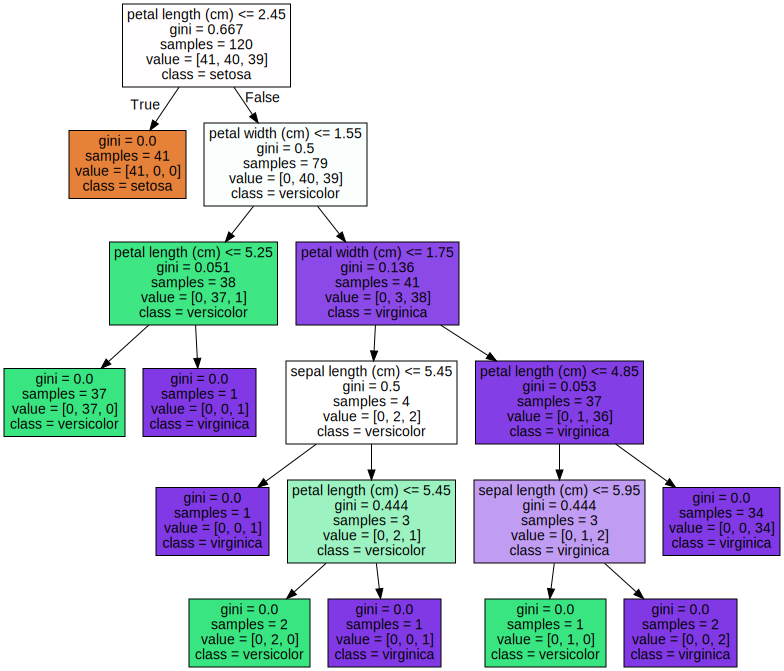

In [ ]:
import graphviz

# 위에서 생성된 tree.dot 파일을 Graphviz 읽어서 Jupyter Notebook상에서 시각화
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

- gini: 다음의 values로 주어진 데이터 분포에서의 지니 계수
- samples: 현 규칙에 해당하는 데이터 건수
- values: 클래스 값 기반의 데이터 건수
  - 붓꽃 데이터 세트는 클래스 값으로 0, 1, 2(Setosa, Versicolor, Virginica) 가짐. Value=[41, 40, 39]면 Setosa 41개, Versicolor 40개, Virginica 39개로 데이터가 구성돼 있다는 말
- 각 노드의 색깔은 붓꽃 데이터의 레이블 값을 의미


`feature_importances_` 속성을 가져와 피처별로 중요도 값 매핑하고 이를 막대그래프로 표현

- 피처가 트리 분할 시 정보 이득이나 지니 계수를 얼마나 효율적으로 잘 개선시켰는지 정규화된 값으로 표현한 것
- 일반적으로 값이 높을수록 해당 피처의 중요도가 높다는 의미

Feature importances:
[0.025 0.    0.555 0.42 ]
sepal length (cm) : 0.025
sepal width (cm) : 0.000
petal length (cm) : 0.555
petal width (cm) : 0.420


<Axes: >

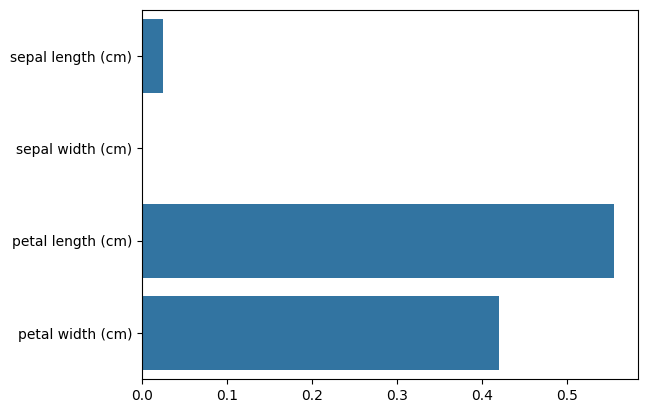

In [ ]:
import seaborn as sns
import numpy as np
%matplotlib inline

# feature importance 추출
print("Feature importances:\n{0}".format(np.round(dt_clf.feature_importances_, 3)))

# feature별 importance 매핑
for name, value in zip(iris_data.feature_names , dt_clf.feature_importances_):
    print('{0} : {1:.3f}'.format(name, value))

# feature importance를 column 별로 시각화 하기
sns.barplot(x=dt_clf.feature_importances_ , y=iris_data.feature_names)

- petal length 피처 중요도가 가장 높음

### 결정 트리(Decision TREE) 과적합(Overfitting)

`make_classification()`: 테스트용 데이터 만들기
- 2개의 피처, 3가지 유형의 클래스 값을 가지는 데이터 세트
- 그래프 형태로 시각화

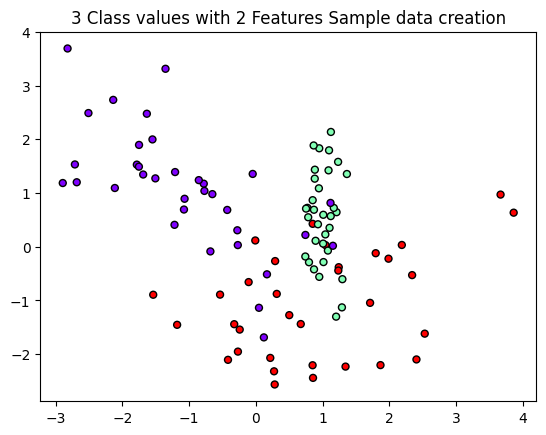

In [ ]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

plt.title("3 Class values with 2 Features Sample data creation")

# 2차원 시각화를 위해서 feature는 2개, 결정값 클래스는 3가지 유형의 classification 샘플 데이터 생성.
X_features, y_labels = make_classification(n_features=2, n_redundant=0, n_informative=2,
                             n_classes=3, n_clusters_per_class=1,random_state=0)

# plot 형태로 2개의 feature로 2차원 좌표 시각화, 각 클래스값은 다른 색깔로 표시됨.
plt.scatter(X_features[:, 0], X_features[:, 1], marker='o', c=y_labels, s=25, cmap='rainbow', edgecolor='k')

결정 트리 모델 분류 확인 위해 별도의 함수 `visualize_boundary()` 생성
- 머신러닝 모델이 클래스 값을 예측하는 결정 기준을 색상과 경계로 나타냄
- 모델이 어떻게 데이터 세트를 예측 분류하는지 잘 이해됨

In [ ]:
import numpy as np

# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()

    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()

    # 호출 파라미터로 들어온 training 데이타로 model 학습 .
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행.
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # contourf() 를 이용하여 class boundary 를 visualization 수행.
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)

결정 트리 생성에 제약 없도록 하이퍼 파라미터가 디폴트인 Classifier 학습하고 결정 기준 경계 시각화

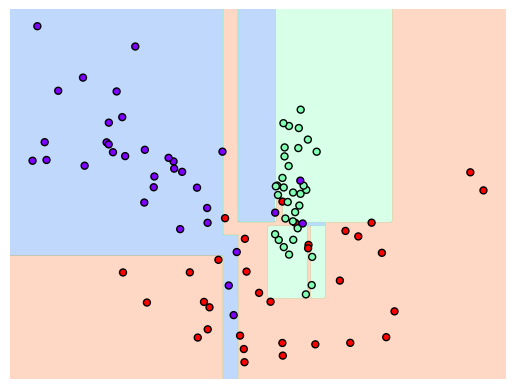

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# 특정한 트리 생성 제약없는 결정 트리의 Decsion Boundary 시각화.
dt_clf = DecisionTreeClassifier(random_state=156).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

- 이상치(Outlier) 데이터까지 분류하기 위해 분할이 자주 일어나서 결정 기준 경계가 매우 많아짐
- 리프 노드 안에 데이터가 모두 균일하거나 하나만 존재해야 하는 엄격한 분할 기준 때문 (기본 하이퍼 파라미터 설정)
- 이렇게 복잡한 모델은 학습 데이터 특성이 약간만 다르면 예측 정확도 떨어지게 됨

6개 이하의 데이터는 리프 노드를 생성할 수 있도록 리프 노드 생성 규칙 완화 후 하이퍼 파라미터 변경

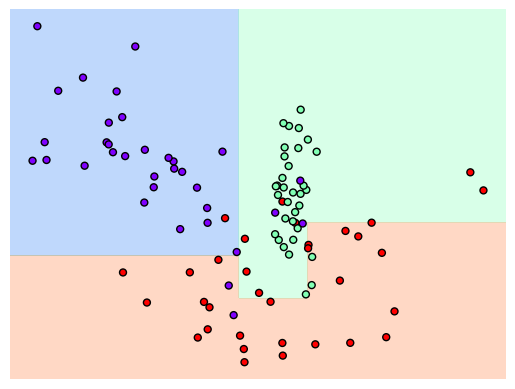

In [ ]:
# min_samples_leaf=6 으로 트리 생성 조건을 제약한 Decision Boundary 시각화
dt_clf = DecisionTreeClassifier(min_samples_leaf=6, random_state=156).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

- 이상치에 크게 반응하지 않으면서 좀 더 일반화된 분류 규칙에 따라 분류됨
- 첫 번째 모델보다 뛰어날 가능성 높음
- 학습 데이터에만 지나치게 최적화된 분류 기준은 테스트 데이터 세트에서 정확도를 떨어뜨린다.

### 결정 트리 실습 - Human Activity Recognition

사용자 행동 인식 데이터 세트
- 피처 561개, 공백으로 분리

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# features.txt 파일에는 피처 이름 index와 피처명이 공백으로 분리되어 있음. 이를 DataFrame으로 로드.
feature_name_df = pd.read_csv('/content/drive/MyDrive/데이터/human_activity/features.txt',sep='\s+',
                        header=None,names=['column_index','column_name'])

# 피처명 index를 제거하고, 피처명만 리스트 객체로 생성한 뒤 샘플로 10개만 추출
feature_name = feature_name_df.iloc[:, 1].values.tolist()
print('전체 피처명에서 10개만 추출:', feature_name[:10])

전체 피처명에서 10개만 추출: ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X']


- 피처명 보면 인체의 움직임과 관련된 속성의 평균/표준편차가 X, Y, Z축 값으로 돼 있음을 유추

중복된 피처명을 확인

In [ ]:
feature_dup_df = feature_name_df.groupby('column_name').count()
print(feature_dup_df[feature_dup_df['column_index'] > 1].count())
feature_dup_df[feature_dup_df['column_index'] > 1].head()

column_index    42
dtype: int64


,column_index
column_name,
"fBodyAcc-bandsEnergy()-1,16",3
"fBodyAcc-bandsEnergy()-1,24",3
"fBodyAcc-bandsEnergy()-1,8",3
"fBodyAcc-bandsEnergy()-17,24",3
"fBodyAcc-bandsEnergy()-17,32",3


- 42개의 피처명이 중복됨

원본 데이터에 중복된 Feature 명으로 인하여 신규 버전의 Pandas에서 Duplicate name 에러를 발생.
중복 feature명에 대해서 원본 feature 명에 '_1(또는2)'를 추가로 부여하는 함수인 get_new_feature_name_df() 생성

In [ ]:
def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(),
                                  columns=['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1])
                                                                                         if x[1] >0 else x[0] ,  axis=1)
    new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
    return new_feature_name_df

train 디렉터리 내 학습용 피처 데이터 세트와 레이블 데이터 세트, test 디렉터리 내 테스트용 피처 데이터 파일과 레이블 파일을 각각 학습/테스트용 DataFrame에 로드

In [ ]:
import pandas as pd

def get_human_dataset( ):

    # 각 데이터 파일들은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep으로 할당.
    feature_name_df = pd.read_csv('/content/drive/MyDrive/데이터/human_activity/features.txt',sep='\s+',
                        header=None,names=['column_index','column_name'])

    # 중복된 피처명을 수정하는 get_new_feature_name_df()를 이용, 신규 피처명 DataFrame생성.
    new_feature_name_df = get_new_feature_name_df(feature_name_df)

    # DataFrame에 피처명을 컬럼으로 부여하기 위해 리스트 객체로 다시 변환
    feature_name = new_feature_name_df.iloc[:, 1].values.tolist()

    # 학습 피처 데이터 셋과 테스트 피처 데이터을 DataFrame으로 로딩. 컬럼명은 feature_name 적용
    X_train = pd.read_csv('/content/drive/MyDrive/데이터/human_activity/train/X_train.txt',sep='\s+', names=feature_name )
    X_test = pd.read_csv('/content/drive/MyDrive/데이터/human_activity/test/X_test.txt',sep='\s+', names=feature_name)

    # 학습 레이블과 테스트 레이블 데이터을 DataFrame으로 로딩하고 컬럼명은 action으로 부여
    y_train = pd.read_csv('/content/drive/MyDrive/데이터/human_activity/train/y_train.txt',sep='\s+',header=None,names=['action'])
    y_test = pd.read_csv('/content/drive/MyDrive/데이터/human_activity/test/y_test.txt',sep='\s+',header=None,names=['action'])

    # 로드된 학습/테스트용 DataFrame을 모두 반환
    return X_train, X_test, y_train, y_test


X_train, X_test, y_train, y_test = get_human_dataset()

In [ ]:
print('## 학습 피처 데이터셋 info()')
print(X_train.info())

## 학습 피처 데이터셋 info()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB
None


- 레코드 7352개
- 피처 561개

In [ ]:
print(y_train['action'].value_counts())

action
6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: count, dtype: int64


- 레이블 값: 1, 2, 3, 4, 5, 6의 6개 값
- 특정 값으로 왜곡되지 않고 비교저 고르게 분포됨

동작 예측 분류 수행
- `DecisionTreeClassifier` 하이퍼 파라미터 모두 디폴트 값

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# 예제 반복 시 마다 동일한 예측 결과 도출을 위해 random_state 설정
dt_clf = DecisionTreeClassifier(random_state=156)
dt_clf.fit(X_train , y_train)
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test , pred)
print('결정 트리 예측 정확도: {0:.4f}'.format(accuracy))

# DecisionTreeClassifier의 하이퍼 파라미터 추출
print('DecisionTreeClassifier 기본 하이퍼 파라미터:\n', dt_clf.get_params())

결정 트리 예측 정확도: 0.8548
DecisionTreeClassifier 기본 하이퍼 파라미터:
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 156, 'splitter': 'best'}


결정 트리의 트리 깊이(Tree Depth)가 예측 정확도에 주는 영향
- `GridSearchCV` 이용해 사이킷런 결정 트리의 깊이를 조절할 수 있는 하이퍼 파라미터인 `max_depth` 값 변화시키면서 예측 성능 확인
- `min_samples_split` 16으로 고정
- `max_depth` 6, 8, 10, 12, 16, 20,24로 늘리면서 예측 성능 측정
- 교차 검증은 5개 세트

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth' : [ 6, 8 ,10, 12, 16 ,20, 24]
}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1 )
grid_cv.fit(X_train , y_train)
print('GridSearchCV 최고 평균 정확도 수치:{0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
GridSearchCV 최고 평균 정확도 수치:0.8513
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 16}


`cv_results_` 속성: CV세트에 하이퍼 파라미터를 순차적으로 입력했을 때의 성능 수치

In [ ]:
# GridSearchCV객체의 cv_results_ 속성을 DataFrame으로 생성.
cv_results_df = pd.DataFrame(grid_cv.cv_results_)

# max_depth 파라미터 값과 그때의 테스트(Evaluation)셋, 학습 데이터 셋의 정확도 수치 추출
cv_results_df[['param_max_depth', 'mean_test_score']]

,param_max_depth,mean_test_score
0,6,0.850791
1,8,0.851069
2,10,0.851209
3,12,0.844135
4,16,0.851344
5,20,0.850800
6,24,0.849440


- `mean_test_score`: 5개의 CV 세트에서 검증용 데이터 세트의 정확도 평균 수치

별도의 테스트 데이터 세트에서 `min_samples_split`은 16으로 고정하고 `max_depth`의 변화에 따른 값 측정

In [ ]:
max_depths = [ 6, 8 ,10, 12, 16 ,20, 24]
# max_depth 값을 변화 시키면서 그때마다 학습과 테스트 셋에서의 예측 성능 측정
for depth in max_depths:
    dt_clf = DecisionTreeClassifier(max_depth=depth, min_samples_split=16, random_state=156)
    dt_clf.fit(X_train , y_train)
    pred = dt_clf.predict(X_test)
    accuracy = accuracy_score(y_test , pred)
    print('max_depth = {0} 정확도: {1:.4f}'.format(depth , accuracy))

max_depth = 6 정확도: 0.8551
max_depth = 8 정확도: 0.8717
max_depth = 10 정확도: 0.8599
max_depth = 12 정확도: 0.8571
max_depth = 16 정확도: 0.8599
max_depth = 20 정확도: 0.8565
max_depth = 24 정확도: 0.8565


- 8일 때 정확도 가장 높음
- 이후 깊어질수록 테스트 데이터 세트 정확도 떨어짐
- 결정 트리는 깊이가 깊어질수록 과적합의 영향력 커지므로 하이퍼 파라미터를 이용해 깊이 제어해야 함

`max_depth`와 `min_samples_split` 변경하면서 정확도 성능 튜닝

In [ ]:
params = {
    'max_depth' : [ 8 , 12, 16 ,20],
    'min_samples_split' : [16, 24],
}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1 )
grid_cv.fit(X_train , y_train)
print('GridSearchCV 최고 평균 정확도 수치: {0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
GridSearchCV 최고 평균 정확도 수치: 0.8549
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 8, 'min_samples_split': 16}


별도 분리된 테스트 데이터 세트에서 해당 하이퍼 파라미터 적용
- `max_depth` 8, `min_samples_split` 16

In [38]:
best_df_clf = grid_cv.best_estimator_
pred1 = best_df_clf.predict(X_test)
accuracy = accuracy_score(y_test , pred1)
print('결정 트리 예측 정확도:{0:.4f}'.format(accuracy))

결정 트리 예측 정확도:0.8717


결정 트리에서 각 피처의 중요도를 `feathrue_importnaces_` 속성 이용해 알아보기
- 중요도 높은 순으로 Top 20

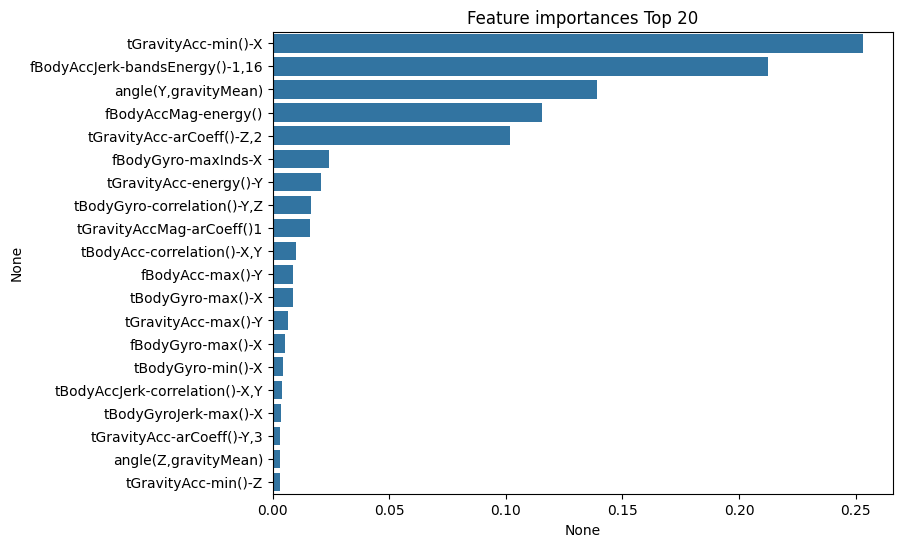

In [39]:
import seaborn as sns

ftr_importances_values = best_df_clf.feature_importances_
# Top 중요도로 정렬을 쉽게 하고, 시본(Seaborn)의 막대그래프로 쉽게 표현하기 위해 Series변환
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns  )
# 중요도값 순으로 Series를 정렬
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]
plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
plt.show()

- Top 5의 피처들이 매우 중요하게 규칙 생성에 영향을 미치고 있다.

## 4.3 앙상블 학습

### 앙상블 학습 개요

앙상블 학습(Ensemble Learning): 여러 개의 분류기(Classifier)를 생성하고 그 예측을 결합함으로써 보다 정확한 최종 예측을 도출하는 기법

유형
- 보팅(Voting)
- 배깅(Bagging)
- 부스팅(Boosting)
- 스태킹을 포함한 다양한 방법

보팅, 배깅: 여러 개의 분류기가 투표를 통해 최종 예측 결과를 결정하는 방식
- 보팅: 서로 다른 알고리즘을 가진 부류기를 결합
- 배깅: 모두 같은 유형의 알고리즘 기반이지만, 데이터 샘플링을 서로 다르게 가져가면서 학습 수행해 보팅 수행
  - 개별 분류기에 할당된 학습 데이터는 원본 학습 데이터를 샘플링해 추출
  - 부트스트래핑(Bootstrapping) 분할 방식: 개별 Classifier에게 데이터를 샘플링해서 추출하는 방식
  - 개별 분류기가 부트스트래핑 방식으로 샘플링된 데이터 세트에 대해서 학습을 통해 개별적인 예측을 수행한 결과를 보팅을 통해 최종 예측 결과를 선정
  - 대표적인 배깅 방식이 랜덤 포레스트 알고리즘


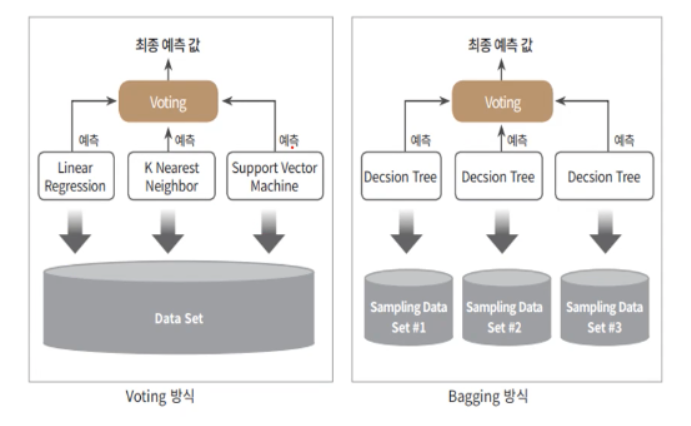

부스팅
- 여러 개의 분류기가 순차적으로 학습을 수행하되, 앞에서 학습한 분류기가 예측이 틀린 데이터에 대해서는 올바르게 예측할 수 있도록 다음 분류기에 가중치(weight)를 부여하면서 학습과 예측을 진행하는 것
- 계속해서 분류기에 가중치를 부스팅하며서 학습을 진행
- 예측 성능 뛰어나 앙상블 학습을 주도
- 그래디언트 부스트, XGBoost, LightGBM

스태킹
- 여러 가지 다른 모델의 에측 결괏값을 다시 학습 데이터로 만들어서 다른 모델로 재학습시켜 결과를 예측하는 방법

### 보팅 유형 - 하드 보팅(Hard Voting)과 소프트 보팅(Soft Voting)

하드 보팅
- 다수결 원칙
- 예측한 결괏값 들 중 다수의 분류기가 결정한 예측값을 최종 보팅 결괏값으로 선정

소프트 보팅
- 분류기들의 레이블 값 결정 확률을 모두 더하고 이를 평균해서 가장 높은 레이블 값을 최종 보팅 결괏값으로 선정
- 일번작으로 소프트 보팅 적용

### 보팅 분류기(Voting Classifier)

사이킷런의 보팅 방식 앙상블 구현 클래스 `VotingClassifier`

위스콘신 유방암 데이터 세트 예측 분석
- 유방암의 악성종양, 양성종양 여부 결정하는 이진 분류 데이터 세트
- 종양의 크기, 모양 등의 형태와 관련한 많은 피처
- 사이킷런 `load_breast_cancer()` 함수로 데이터 세트 생성
- 로지스틱 회귀와 KNN 기반으로 보팅 분류기 만들기

필요한 모듈과 데이터 로딩 후 위스콘신 데이터 세트 살펴보기

In [40]:
import pandas as pd

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer = load_breast_cancer()

data_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
data_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


로지스틱 회귀와 KNN 기반 소프트 보팅 방식으로 보팅 분류기 만들기

In [41]:
# 개별 모델은 로지스틱 회귀와 KNN 임.
lr_clf = LogisticRegression(solver='liblinear')
knn_clf = KNeighborsClassifier(n_neighbors=8)

# 개별 모델을 소프트 보팅 기반의 앙상블 모델로 구현한 분류기
# estimators: 리스트 값으로 보팅에 사용될 여러 개의 Classifier 객체들을 튜플 형식으로 입력 받음
# voting: 'hard' 하드보팅, 'soft' 소프트 보팅 방식 적용, 기본은 'hard'
vo_clf = VotingClassifier( estimators=[('LR',lr_clf),('KNN',knn_clf)] , voting='soft' )

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    test_size=0.2 , random_state= 156)

# VotingClassifier 학습/예측/평가.
vo_clf.fit(X_train , y_train)
pred = vo_clf.predict(X_test)
print('Voting 분류기 정확도: {0:.4f}'.format(accuracy_score(y_test , pred)))

# 개별 모델의 학습/예측/평가.
classifiers = [lr_clf, knn_clf]
for classifier in classifiers:
    classifier.fit(X_train , y_train)
    pred = classifier.predict(X_test)
    class_name= classifier.__class__.__name__
    print('{0} 정확도: {1:.4f}'.format(class_name, accuracy_score(y_test , pred)))

Voting 분류기 정확도: 0.9561
LogisticRegression 정확도: 0.9474
KNeighborsClassifier 정확도: 0.9386


## 4.4 Random Forest

### 랜덤 포레스트의 개요 및 실습

- 배깅(bagging): 같은 알고리즘으로 여러 개의 분류기를 만들어서 보팅으로 최종 결정하는 알고리즘
- 여러 개의 결정 트리 분류기가 전체 데이터에서 배깅 방식으로 각자의 데이터를 샘플링해 개별적으로 학습 수행한 뒤 최종적으로 모든 분류기가 보팅을 통해 예측 결정
- 부트스트래핑(bootstrapping): 여러 개의 데이터 세트를 중첩되게 분리하는 것(Bagging이 bootstrap aggregating의 줄임말)
- 랜덤 포레스트의 서브세트(Subset) 데이터는 부트스트래핑으로 데이터가 임의로 만들어짐
- 데이터가 중첩된 개별 데이터 세트에 결정 트리 분류기를 각각 적용하는 것

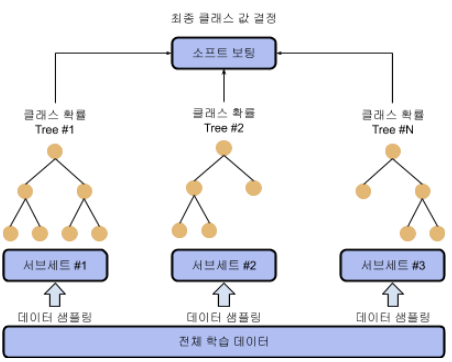

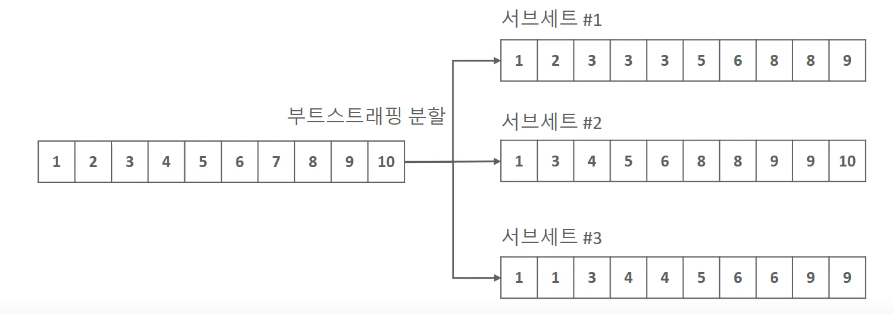

사용자 행동 인식 데이터 세트 `RandomForestClassifier` 이용해 예측

In [42]:
def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(),
                                  columns=['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1])
                                                                                         if x[1] >0 else x[0] ,  axis=1)
    new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
    return new_feature_name_df

In [43]:
import pandas as pd

def get_human_dataset( ):

    # 각 데이터 파일들은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep으로 할당.
    feature_name_df = pd.read_csv('/content/drive/MyDrive/데이터/human_activity/features.txt',sep='\s+',
                        header=None,names=['column_index','column_name'])

    # 중복된 피처명을 수정하는 get_new_feature_name_df()를 이용, 신규 피처명 DataFrame생성.
    new_feature_name_df = get_new_feature_name_df(feature_name_df)

    # DataFrame에 피처명을 컬럼으로 부여하기 위해 리스트 객체로 다시 변환
    feature_name = new_feature_name_df.iloc[:, 1].values.tolist()

    # 학습 피처 데이터 셋과 테스트 피처 데이터을 DataFrame으로 로딩. 컬럼명은 feature_name 적용
    X_train = pd.read_csv('/content/drive/MyDrive/데이터/human_activity/train/X_train.txt',sep='\s+', names=feature_name )
    X_test = pd.read_csv('/content/drive/MyDrive/데이터/human_activity/test/X_test.txt',sep='\s+', names=feature_name)

    # 학습 레이블과 테스트 레이블 데이터을 DataFrame으로 로딩하고 컬럼명은 action으로 부여
    y_train = pd.read_csv('/content/drive/MyDrive/데이터/human_activity/train/y_train.txt',sep='\s+',header=None,names=['action'])
    y_test = pd.read_csv('/content/drive/MyDrive/데이터/human_activity/test/y_test.txt',sep='\s+',header=None,names=['action'])

    # 로드된 학습/테스트용 DataFrame을 모두 반환
    return X_train, X_test, y_train, y_test


X_train, X_test, y_train, y_test = get_human_dataset()

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# 결정 트리에서 사용한 get_human_dataset( )을 이용해 학습/테스트용 DataFrame 반환
X_train, X_test, y_train, y_test = get_human_dataset()

# 랜덤 포레스트 학습 및 별도의 테스트 셋으로 예측 성능 평가
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train , y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test , pred)
print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy))

랜덤 포레스트 정확도: 0.9253


### 랜덤 포레스트 하이퍼 파라미터 및 튜닝

`n_estimators`
- 랜덤 포레스트에서 결정 트리의 개수 지정
- 디폴트는 10
- 많이 설정할수록 좋은 성능 기대할 수 있지만 무조건 향상되는 것은 아님
- 늘릴수록 학습 수행 시간 오래 걸림

`max_features`
- 결정 트리의 `max_features` 파라미터와 동일
- 디폴트는 'None'이 아니라 'auto', 즉 'sqrt'
- 랜덤 포레스트의 트리를 분할하는 피처를 참조할 때 전체 피처가 아니라 sqrt만큼 참조

`max_depth`, `min_samples_leat`, `min_samples_split`
- 결정 트리에서 과적합 개선하기 위해 사용되는 파라미터 똑같이 적용

`GridSearchCV` 이용해 랜덤 포레스트의 하이퍼 파라미터 튜닝
- 사용자 행동 데이터 세트 이용
- 튜닝 시간 절약 위해 `n_estimators`는 100, `CV`를 2로 설정해 최적 하이퍼 파라미터 구하기

In [45]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[100],
    'max_depth' : [6, 8, 10, 12],
    'min_samples_leaf' : [8, 12, 18 ],
    'min_samples_split' : [8, 16, 20]
}
# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf = RandomForestClassifier(random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf , param_grid=params , cv=2, n_jobs=-1 )
grid_cv.fit(X_train , y_train)

print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:
 {'max_depth': 10, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 100}
최고 예측 정확도: 0.9180


- max_depth: 10, min_samples_leaf: 8, min_samples_split: 8일 때 2개의 CV 세트에서 약 91.8%의 평균 정확도가 측정 됨

추출된 최적 하이퍼 파라미터로 다시 `RandomForestClassifier` 학습시킨 뒤 별도의 테스트 데이터 세트에서 예측 성능 측정

In [46]:
rf_clf1 = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_leaf=8, \
                                 min_samples_split=8, random_state=0)
rf_clf1.fit(X_train , y_train)
pred = rf_clf1.predict(X_test)
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test , pred)))

예측 정확도: 0.9196


`featrue_importance_` 속성을 이용해 알고리즘이 선택한 피처의 중요도 막대그래프로 시각화

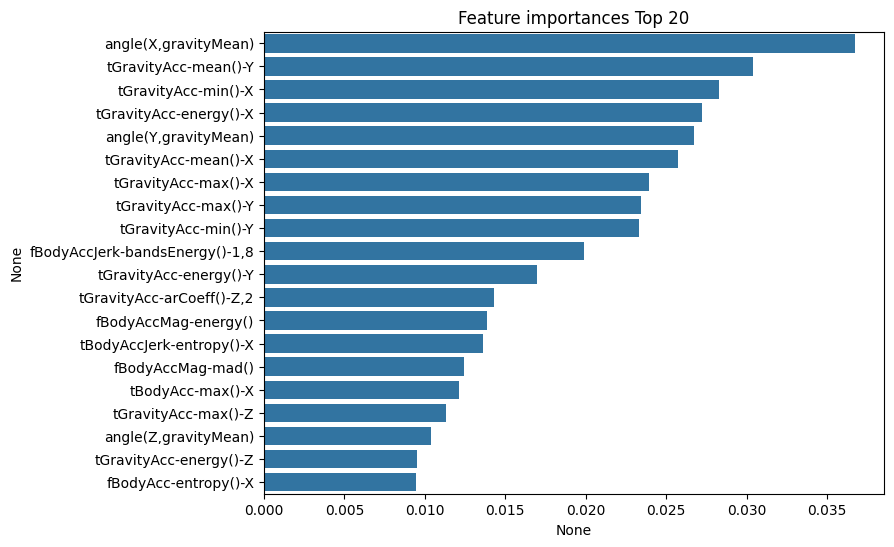

<Figure size 640x480 with 0 Axes>

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = rf_clf1.feature_importances_
ftr_importances = pd.Series(ftr_importances_values,index=X_train.columns  )
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
fig1 = plt.gcf()
plt.show()
plt.draw()
fig1.savefig('rf_feature_importances_top20.tif', format='tif', dpi=300, bbox_inches='tight')

- angle(X,gravityMean), tGravityAcc-mean()-Y, tGravityAcc-min()-X 등이 높은 피처 중요도를 가지고 있다.